In [1]:
from dolfin import *
import matplotlib.pyplot as plt

import numpy as np

In [23]:
# Define the mesh
length = 1.0
width = 1.0
nx = ny = 50  # Number of cells in x and y directions
# https://fenicsproject.org/olddocs/dolfin/1.6.0/python/programmers-reference/cpp/mesh/RectangleMesh.html
mesh = RectangleMesh(Point(0, 0), Point(length, width), nx, ny)

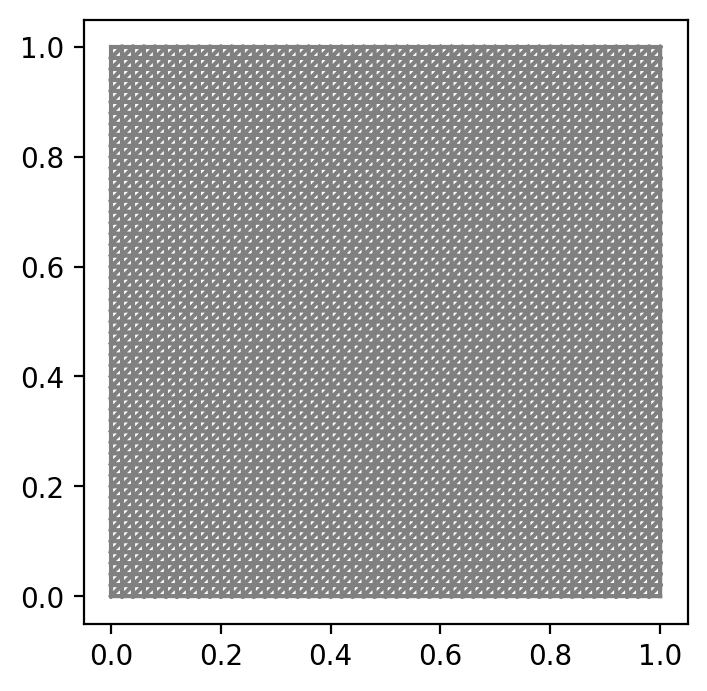

In [24]:
# Plot the mesh
plt.figure(dpi=200)
plot(mesh)

In [25]:
# Define the function space
# https://fenicsproject.org/olddocs/dolfin/1.6.0/python/programmers-reference/functions/functionspace/FunctionSpace.html
# In this case, the finite element family is specified as 'P', which stands for Lagrange polynomials.
V = FunctionSpace(mesh, 'P', 2)
V

FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 88), FiniteElement('Lagrange', triangle, 2))

In [27]:
# Define the boundary conditions
T_top = Constant(1)
T_bottom = Constant(1)
T_left = Constant(0)
T_right = Constant(0)

In [29]:
tol = 1E-14  # tolerance for point location
def top_boundary(x, on_boundary):
    return on_boundary and np.isclose(x[1], 1.0, rtol=0.0, atol=tol)

def bottom_boundary(x, on_boundary):
    return on_boundary and np.isclose(x[1], 0.0, rtol=0.0, atol=tol)

def left_boundary(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0.0, rtol=0.0, atol=tol)

def right_boundary(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1.0, rtol=0.0, atol=tol)

bc_top = DirichletBC(V, T_top, top_boundary)
bc_bottom = DirichletBC(V, T_bottom, bottom_boundary)
bc_left = DirichletBC(V, T_left, left_boundary)
bc_right = DirichletBC(V, T_right, right_boundary)
bcs = [bc_top, bc_bottom, bc_left, bc_right]


In [30]:
# Define the variational problem
'''
In this example, the trial function u and the test function v are both defined on the function space V, 
which is a space of piecewise linear continuous functions ('P' stands for Lagrange polynomials) with degree 1. 
'''
u = TrialFunction(V)
v = TestFunction(V)

a = dot(grad(u), grad(v)) * dx
L = Constant(0) * v * dx

In [31]:
# Solve the problem
u = Function(V)
solve(a == L, u, bcs)

Solving linear variational problem.


Text(0, 0.5, 'y')

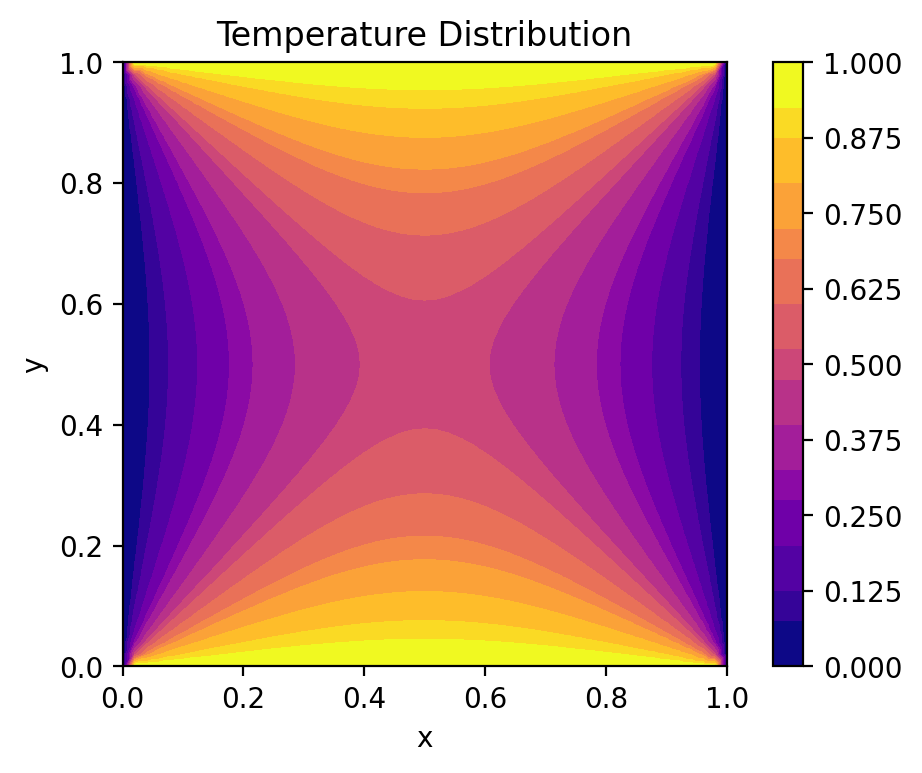

In [33]:
# Plot the solution
fig =plt.figure(dpi=200)
sc = plot(u, cmap=plt.get_cmap('plasma', 15))
fig.colorbar(sc)
plt.title('Temperature Distribution')
plt.xlabel('x')
plt.ylabel('y')